<a href="https://colab.research.google.com/github/6058ah/DataScienceStudy/blob/master/Chapter8_2%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#8.2 합성곱 신경망을 사용한 이미지 분류
##패션 MNIST 데이터 불러오기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
model = keras.Sequential()

In [3]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                              padding='same', input_shape=(28,28,1)))

In [4]:
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               627300    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 628,630
Trainable params: 628,630
Non-trainable params: 0
__________________________________________________

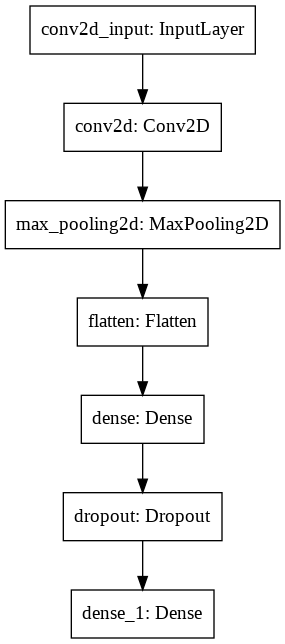

In [7]:
keras.utils.plot_model(model)

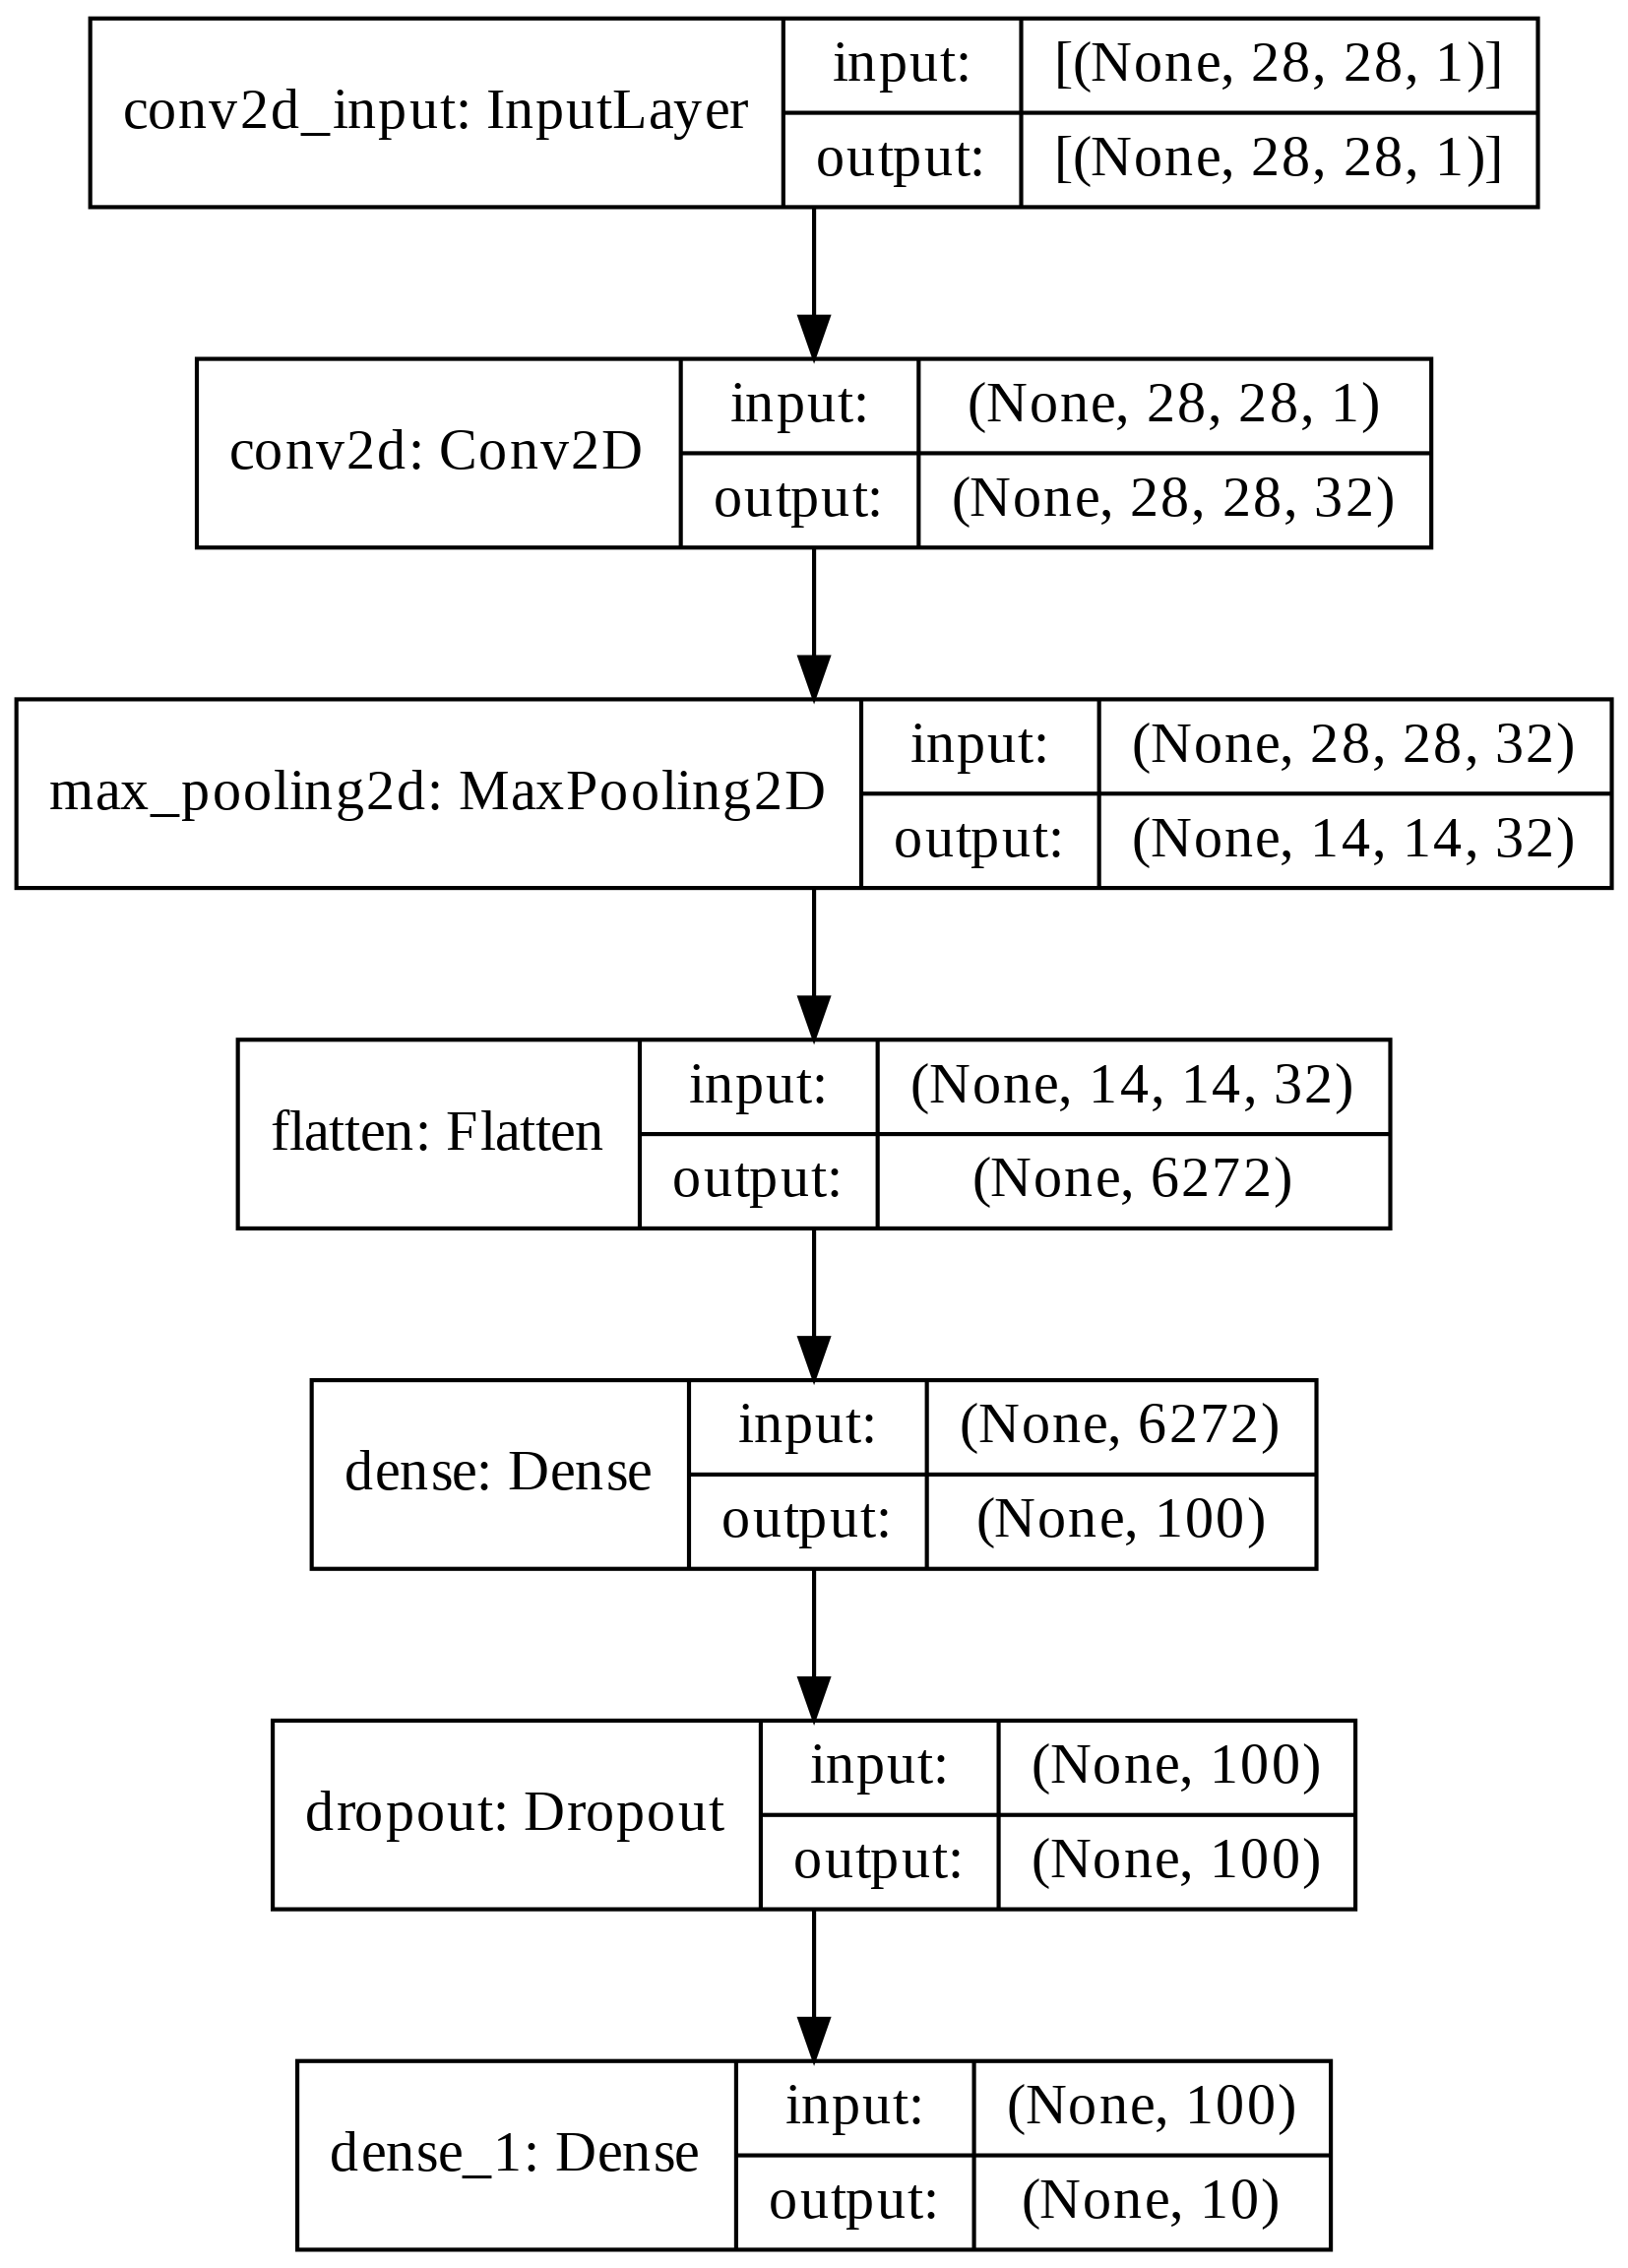

In [8]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

##모델 컴파일과 훈련

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.4862 - accuracy: 0.8288 - val_loss: 0.3481 - val_accuracy: 0.8719
Epoch 2/20
1500/1500 [==============================] - 23s 16ms/step - loss: 0.3325 - accuracy: 0.8817 - val_loss: 0.2853 - val_accuracy: 0.8955
Epoch 3/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2909 - accuracy: 0.8944 - val_loss: 0.2695 - val_accuracy: 0.9000
Epoch 4/20
1500/1500 [==============================] - 23s 16ms/step - loss: 0.2679 - accuracy: 0.9028 - val_loss: 0.2585 - val_accuracy: 0.9059
Epoch 5/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2469 - accuracy: 0.9078 - val_loss: 0.2509 - val_accuracy: 0.9090
Epoch 6/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2262 - accuracy: 0.9167 - val_loss: 0.2532 - val_accuracy: 0.9071
Epoch 7/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2165 - accuracy: 0.9189 - val_loss: 0.2476 -

In [10]:
import matplotlib.pyplot as plt

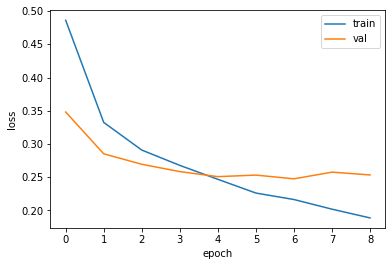

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [12]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 6ms/step - loss: 0.2476 - accuracy: 0.9103


[0.24762190878391266, 0.9103333353996277]

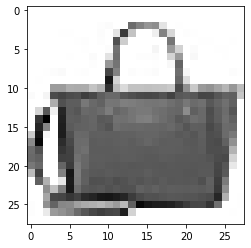

In [13]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [14]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[3.2496700e-17 2.3889142e-21 3.7494741e-18 2.2808033e-15 2.8008673e-17
  4.5013873e-10 4.1586933e-16 2.9481819e-14 1.0000000e+00 3.4241405e-22]]


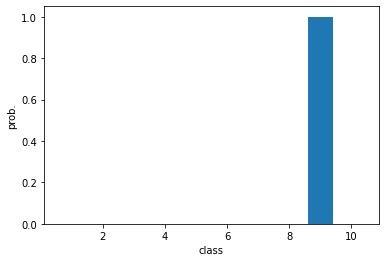

In [15]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [16]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [17]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [18]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [19]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 6ms/step - loss: 0.2631 - accuracy: 0.9061


[0.2631496489048004, 0.9060999751091003]